<a href="https://colab.research.google.com/github/kinyuadennis/Teen-phone-addiction/blob/main/preprosessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.info()
df.describe()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [ ]:
df['Screen_Time_Before_Bed'] = df['Screen_Time_Before_Bed'].fillna(df['Screen_Time_Before_Bed'].median())

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_cols)


['Name', 'Gender', 'Location', 'School_Grade', 'Phone_Usage_Purpose']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [ ]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
display(df.head())

,ID,Name,Age,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,...,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level,Gender_1,Gender_2
0,1,Shannon Francis,13,Hansonfort,9th,4.0,6.1,78,5,0.1,...,19,3.6,1.7,1.2,Browsing,4,8.7,10.0,False,False
1,2,Scott Rodriguez,17,Theodorefort,7th,5.5,6.5,70,5,0.0,...,9,1.1,4.0,1.8,Browsing,2,5.3,10.0,False,False
2,3,Adrian Knox,13,Lindseystad,11th,5.8,5.5,93,8,0.8,...,8,0.3,1.5,0.4,Education,6,5.7,9.2,False,True
3,4,Brittany Hamilton,18,West Anthony,12th,3.1,3.9,78,8,1.6,...,7,3.1,1.6,0.8,Social Media,8,3.0,9.8,False,False
4,5,Steven Smith,14,Port Lindsaystad,9th,2.5,6.7,56,4,1.1,...,20,2.6,0.9,1.1,Gaming,10,3.7,8.6,False,True


**Label Encoding for Binary Fields**

In [3]:
import pandas as pd
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Example: Scale sleep hours and screen time
df[['Sleep_Hours', 'Screen_Time_Before_Bed']] = scaler.fit_transform(df[['Sleep_Hours', 'Screen_Time_Before_Bed']])

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of the categories
grade_order = ['7th', '8th', '9th', '10th', '11th', '12th']

# Initialize the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[grade_order])

# Fit and transform the 'School_Grade' column
df['School_Grade_Encoded'] = ordinal_encoder.fit_transform(df[['School_Grade']])

# Display the first few rows with the new encoded column
display(df[['School_Grade', 'School_Grade_Encoded']].head())

,School_Grade,School_Grade_Encoded
0,9th,2.0
1,7th,0.0
2,11th,4.0
3,12th,5.0
4,9th,2.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['School_Grade_Encoded'].plot(kind='hist', bins=20, title='School_Grade_Encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('School_Grade').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='School_Grade_Encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['School_Grade_Encoded']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('School_Grade')):
  _plot_series(series, series_name, i)
  fig.legend(title='School_Grade', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('School_Grade_Encoded')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('School_Grade')):
  _plot_series(series, series_name, i)
  fig.legend(title='School_Grade', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['School_Grade_Encoded'].plot(kind='line', figsize=(8, 4), title='School_Grade_Encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['School_Grade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='School_Grade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['School_Grade'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='School_Grade_Encoded', y='School_Grade', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

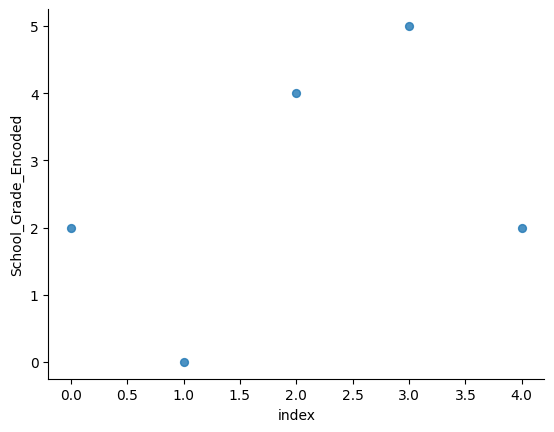

In [7]:
from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='School_Grade_Encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Train-Test Split**

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude non-numeric and original categorical columns that have been encoded
X = df.drop(['ID', 'Name', 'Location', 'School_Grade', 'Phone_Usage_Purpose', 'Addiction_Level'], axis=1)
y = df['Addiction_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (2400, 20) (2400,)
Testing set shape (X_test, y_test): (600, 20) (600,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Daily_Usage_Hours', 'Sleep_Hours']])
